In [1]:
import pandas_datareader as pdr
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

In [3]:
df = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876106,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320206,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,192.848206,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,191.802170,42628800


In [6]:
df.to_csv('AAPL.csv')

In [7]:
#creating data frame with only closing prices
df1 = df.reset_index()['Close']

In [8]:
df1.shape

(1006,)

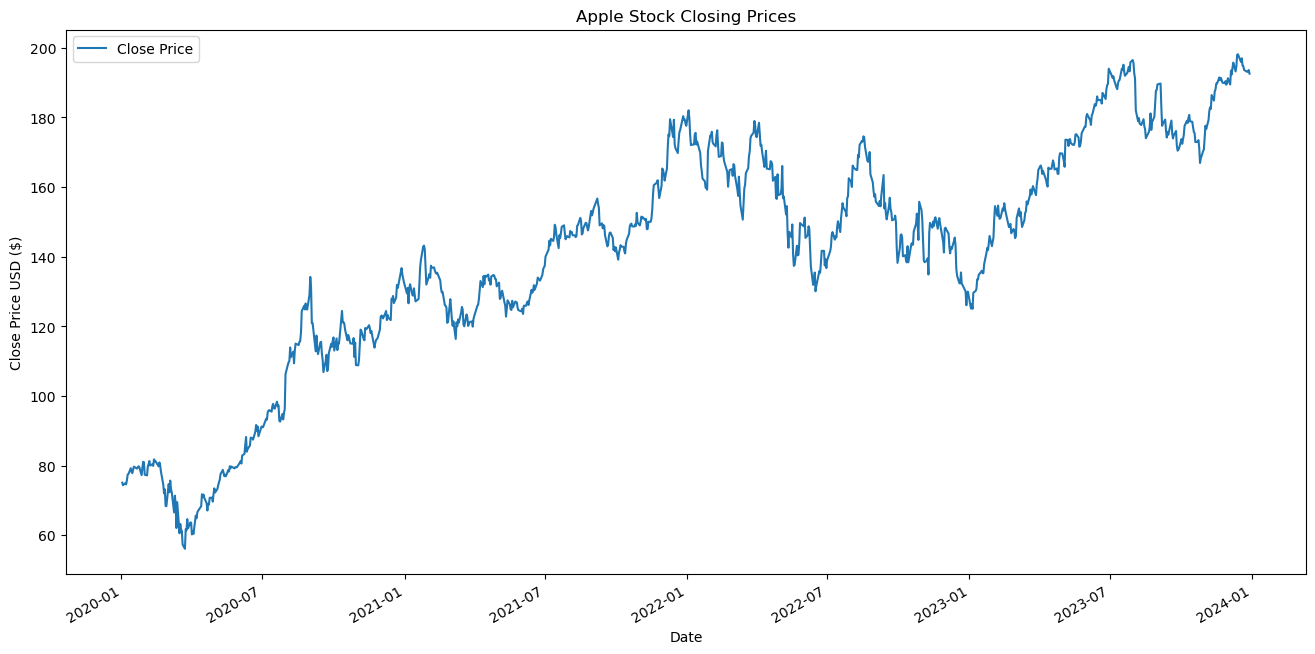

In [9]:
plt.figure(figsize=(16,8))
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Plot the 'Close' prices with date index
plt.plot(df.index, df['Close'], label='Close Price')

# Optional: Improve date formatting on x-axis
plt.gcf().autofmt_xdate()  # Auto-format date labels for better readability

plt.legend()
plt.show()


In [10]:
df1

0        75.087502
1        74.357498
2        74.949997
3        74.597504
4        75.797501
           ...    
1001    193.600006
1002    193.050003
1003    193.149994
1004    193.580002
1005    192.529999
Name: Close, Length: 1006, dtype: float64

In [11]:
#doing normalization of closing prices
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1.shape

(1006, 1)

In [13]:
df1

array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       ...,
       [0.96507468],
       [0.96810253],
       [0.96070906]])

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(653, 353)

In [16]:
train_data

array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       [0.13030088],
       [0.13875052],
       [0.15008715],
       [0.15131936],
       [0.16299047],
       [0.15545619],
       [0.15309733],
       [0.15996267],
       [0.16610632],
       [0.16230396],
       [0.16429316],
       [0.16698649],
       [0.16536695],
       [0.14889013],
       [0.16427554],
       [0.17598183],
       [0.17515447],
       [0.14987592],
       [0.14837961],
       [0.16631755],
       [0.17089446],
       [0.17751333],
       [0.16839474],
       [0.17107045],
       [0.16765538],
       [0.18101645],
       [0.17691481],
       [0.17705567],
       [0.16658159],
       [0.17471438],
       [0.16887002],
       [0.15610751],
       [0.12993116],
       [0.11215165],
       [0.12019645],
       [0.08652102],
       [0.08623935],
       [0.13104019],
       [0.11433452],
       [0.13795834],
       [0.12067178],
       [0.11382401],
       [0.07358251],
       [0.10732832],
       [0.089

In [17]:
test_data

array([[0.76932424],
       [0.7659443 ],
       [0.76629639],
       [0.79671523],
       [0.79143419],
       [0.8168536 ],
       [0.82452868],
       [0.82340203],
       [0.83410497],
       [0.83128835],
       [0.81276958],
       [0.78495613],
       [0.78256198],
       [0.78467441],
       [0.80227788],
       [0.75714257],
       [0.74136994],
       [0.7239777 ],
       [0.71207774],
       [0.71728841],
       [0.70214937],
       [0.6931364 ],
       [0.70320564],
       [0.69264356],
       [0.71313391],
       [0.75580469],
       [0.68827783],
       [0.69862867],
       [0.67792698],
       [0.66616788],
       [0.69278431],
       [0.70982445],
       [0.6874329 ],
       [0.68053237],
       [0.66426668],
       [0.66666083],
       [0.67363173],
       [0.66011228],
       [0.60828768],
       [0.57815056],
       [0.60807645],
       [0.63377757],
       [0.6358899 ],
       [0.62905975],
       [0.59145877],
       [0.59378244],
       [0.58364283],
       [0.579

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(552, 100)
(552,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(252, 100)
(252,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
# Define and compile the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 8s 262ms/step - loss: 0.1204 - val_loss: 0.0086
Epoch 2/100
9/9 [==============================] - 1s 108ms/step - loss: 0.0156 - val_loss: 0.0432
Epoch 3/100
9/9 [==============================] - 1s 109ms/step - loss: 0.0075 - val_loss: 0.0037
Epoch 4/100
9/9 [==============================] - 1s 108ms/step - loss: 0.0052 - val_loss: 0.0218
Epoch 5/100
9/9 [==============================] - 1s 108ms/step - loss: 0.0042 - val_loss: 0.0049
Epoch 6/100
9/9 [==============================] - 1s 110ms/step - loss: 0.0038 - val_loss: 0.0110
Epoch 7/100
9/9 [==============================] - 1s 118ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 8/100
9/9 [==============================] - 1s 128ms/step - loss: 0.0028 - val_loss: 0.0060
Epoch 9/100
9/9 [==============================] - 1s 130ms/step - loss: 0.0027 - val_loss: 0.0048
Epoch 10/100
9/9 [==============================] - 1s 130ms/step - loss: 0.0025 - val_loss: 0.0037
Epoch 11/

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.10.0'

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 33ms/step


In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

138.7560591765728

In [32]:
math.sqrt(mean_squared_error(ytest,test_predict))

171.08804774610414

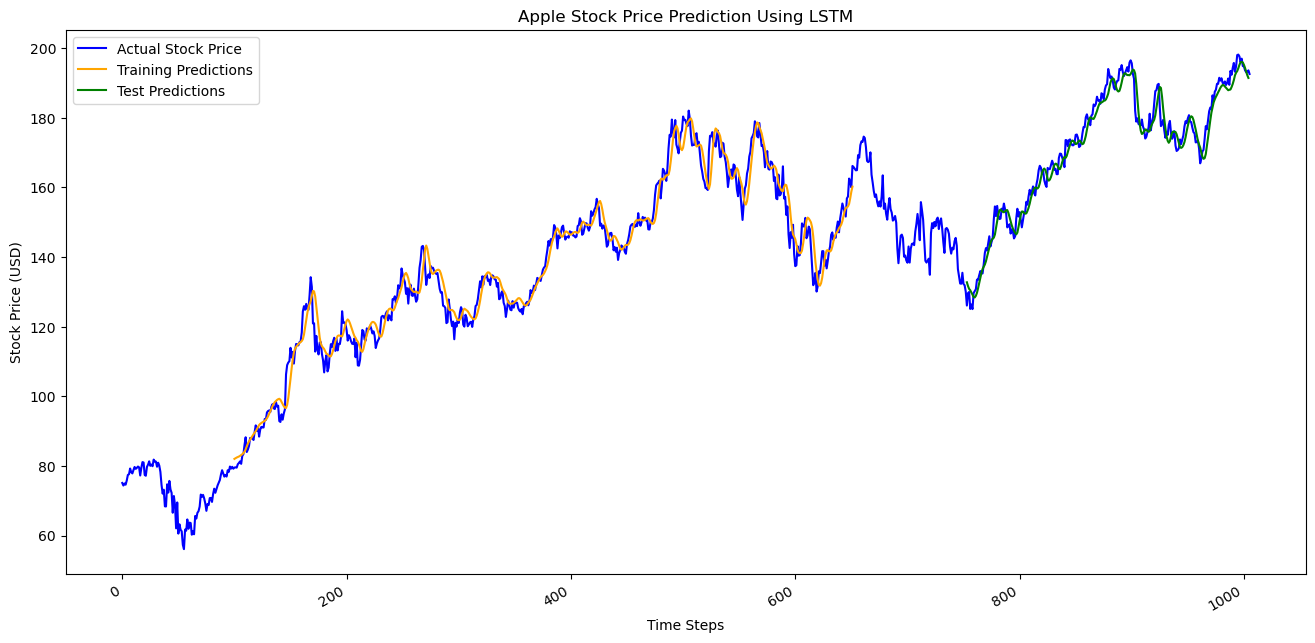

In [33]:

# Ensure your data (train_predict, test_predict, df1) is already defined and processed

# Set the look_back window (this is typically the same as the time_step used in your LSTM)
look_back = 100

# Prepare the data for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

# Plot the baseline and predictions
plt.figure(figsize=(16, 8))
plt.plot(scaler.inverse_transform(df1), label='Actual Stock Price', color='blue')
plt.plot(trainPredictPlot, label='Training Predictions', color='orange')
plt.plot(testPredictPlot, label='Test Predictions', color='green')

# Add titles and labels
plt.title('Apple Stock Price Prediction Using LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price (USD)')

# Display legend
plt.legend()

# Optionally, auto-format the dates for better readability if using dates on x-axis
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()


In [34]:
len(test_data)

353

In [35]:
x_input=test_data[253:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.8597356106669,
 0.858186497227594,
 0.8569189919395174,
 0.8686782005314347,
 0.854524946603506,
 0.848328600289301,
 0.8302321875860551,
 0.833682505235967,
 0.8431883114029598,
 0.8529758331642,
 0.8803668190602626,
 0.8469907198241716,
 0.8626929797483879,
 0.8738183819747575,
 0.901490976022049,
 0.9263470587849764,
 0.9278961722242821,
 0.939092057070723,
 0.940781920864134,
 0.8929709595488854,
 0.8552995033231588,
 0.8596651280468287,
 0.8679740189888344,
 0.8464273960786951,
 0.8317109258483083,
 0.842484237303378,
 0.8373439484170365,
 0.858186497227594,
 0.8659320644241232,
 0.8407238908898956,
 0.8297392390176314,
 0.8357948349777308,
 0.8448782826393894,
 0.8158678081269685,
 0.8050943892288803,
 0.8069252182624337,
 0.8105867688865217,
 0.828471841172573,
 0.8189659275625617,
 0.8278381422500437,
 0.8366398743174547,
 0.8548066621977534,
 0.8653687406786467,
 0.8611438663090819,
 0.8710722458674461,
 0.8774799325988457,
 0.8643829509848174,
 0.8634675364680408,
 0.85241

In [38]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.94871736]
101
1 day input [0.8581865  0.85691899 0.8686782  0.85452495 0.8483286  0.83023219
 0.83368251 0.84318831 0.85297583 0.88036682 0.84699072 0.86269298
 0.87381838 0.90149098 0.92634706 0.92789617 0.93909206 0.94078192
 0.89297096 0.8552995  0.85966513 0.86797402 0.8464274  0.83171093
 0.84248424 0.83734395 0.8581865  0.86593206 0.84072389 0.82973924
 0.83579483 0.84487828 0.81586781 0.80509439 0.80692522 0.81058677
 0.82847184 0.81896593 0.82783814 0.83663987 0.85480666 0.86536874
 0.86114387 0.87107225 0.87747993 0.86438295 0.86346754 0.85241251
 0.84318831 0.84051266 0.82234587 0.8231908  0.82628903 0.80981221
 0.78016793 0.78953299 0.8041086  0.80748854 0.83002095 0.85536999
 0.84889182 0.8670586  0.88529587 0.8928301  0.88945027 0.91754533
 0.90627917 0.92486843 0.92888196 0.9408524  0.94071155 0.95310435
 0.94740084 0.95211856 0.94268313 0.94141562 0.94571087 0.93845825
 0.94254227 0.95162571 0.93888072 0.96697588 0.95923042 0.9729611
 0.98310072 0.96528591 0.97605933 

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
len(df1)

1006

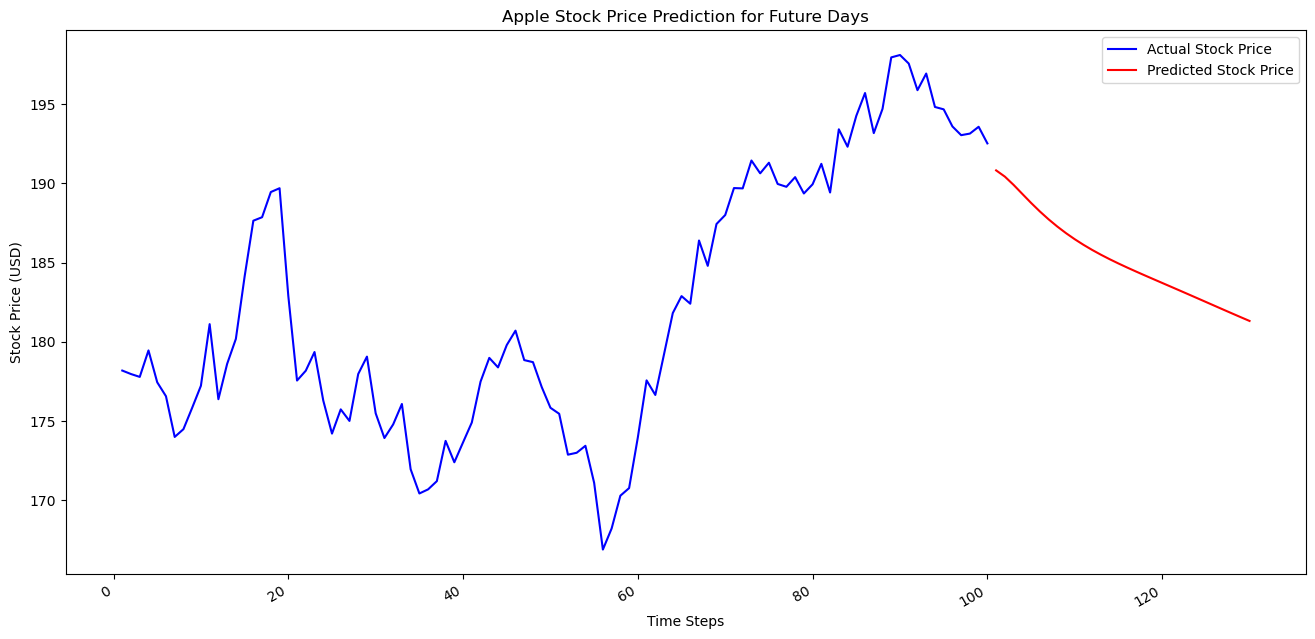

In [41]:

# Assuming day_new and day_pred are arrays/lists of dates or indices
# If they are indices, you may need to convert them to date objects using df.index[day_new] and df.index[day_pred]

# Convert day_new and day_pred to date format if they are indices
# Example: 
# day_new = df.index[906:] if df.index is a DatetimeIndex
# day_pred = future_dates_array where future_dates_array should be defined

# Plot the actual stock prices for the last portion of your data
plt.figure(figsize=(16,8))
plt.plot(day_new, scaler.inverse_transform(df1[906:]), label='Actual Stock Price', color='blue')

# Plot the predicted stock prices
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted Stock Price', color='red')

# Add titles and labels
plt.title('Apple Stock Price Prediction for Future Days')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price (USD)')

# Display legend
plt.legend()

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()


In [42]:
# Assuming df1 is your original scaled data and lst_output contains the predicted values

# Convert df1 to a list and extend it with lst_output
df3 = df1.tolist()
df3.extend(lst_output)

In [43]:
df3=scaler.inverse_transform(df3).tolist()

In [44]:
# Assuming df3 has been inverse transformed and converted to a list
df3 = scaler.inverse_transform(df3).tolist()

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE for training and test data
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(ytest, test_predict))

print('Training RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

# You can also calculate MAE
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(ytest, test_predict)

print('Training MAE:', train_mae)
print('Test MAE:', test_mae)


Training RMSE: 138.7560591765728
Test RMSE: 171.08804774610414
Training MAE: 136.90218785396837
Test MAE: 170.2148695237018


In [46]:
#increasing more accuracy by doing - 
# 1)Add Regularization to the LSTM Model: Helps prevent overfitting.
# 2)Feature Engineering: Adds additional predictive power to the model.
# 3)Hyperparameter Tuning: Optimizes the model's performance.
# 4)Training and Evaluation: Train the model with the best configuration and evaluate its accuracy.

In [47]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

# Define the model with added dropout and L2 regularization
model = Sequential()

# First LSTM layer with dropout and L2 regularization
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1),
               kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

# Second LSTM layer with dropout
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(25))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [48]:
import pandas as pd

# Assuming df is your DataFrame with stock prices
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Scale and prepare the features for the model


In [49]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming you have already loaded your data and it's in 'df1'
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# Function to create sequences (X) and targets (y)
def create_dataset(dataset, look_back=100):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Create X and y datasets
look_back = 100
X, y = create_dataset(scaled_data, look_back)

# Reshape X to be [samples, time steps, features] which is expected by LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# Define the model builder function for hyperparameter tuning
def build_model(hp):
    model = Sequential()

    # First LSTM layer with dropout and L2 regularization
    model.add(LSTM(
        units=hp.Int('lstm_units_1', min_value=50, max_value=200, step=50),
        return_sequences=True, 
        input_shape=(X_train.shape[1], 1),
        kernel_regularizer=l2(hp.Float('l2_regularizer_1', 0.001, 0.01, sampling='log'))
    ))
    model.add(Dropout(hp.Float('dropout_rate_1', 0.2, 0.5, step=0.1)))

    # Second LSTM layer with dropout
    model.add(LSTM(
        units=hp.Int('lstm_units_2', min_value=50, max_value=200, step=50),
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_rate_2', 0.2, 0.5, step=0.1)))

    # Dense layers
    model.add(Dense(units=hp.Int('dense_units', min_value=10, max_value=50, step=5)))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # You can adjust the number of trials based on your needs
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='lstm_tuning'
)

# Run the tuner search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the best model
best_model.summary()

# Fit the best model
best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Evaluate the best model on the test set
test_loss = best_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Test RMSE: {rmse}')


Reloading Tuner from hyperparameter_tuning\lstm_tuning\tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 150)          91200     
                                                                 
 dropout (Dropout)           (None, 100, 150)          0         
                                                                 
 lstm_1 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense (Dense)               (None, 40)                6040      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                       

In [50]:
train_predict = best_model.predict(X_train)
print("Shape of y_train:", y_train.shape)
print("Shape of train_predict:", train_predict.shape)
if len(train_predict.shape) > 1:
    train_predict = train_predict[:, 0]  # Flatten if necessary


23/23 [==============================] - 1s 25ms/step
Shape of y_train: (724,)
Shape of train_predict: (724, 1)


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE for training data
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))

# Make predictions for test data
test_predict = best_model.predict(X_test)

# Print shapes for verification
print("Shape of y_test:", y_test.shape)
print("Shape of test_predict:", test_predict.shape)

# Flatten predictions if necessary
if len(test_predict.shape) > 1:
    test_predict = test_predict[:, 0]

# Calculate RMSE for test data
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

# Calculate MAE for training and test data
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)

# Print RMSE and MAE
print('Training RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Training MAE:', train_mae)
print('Test MAE:', test_mae)


6/6 [==============================] - 0s 28ms/step
Shape of y_test: (182,)
Shape of test_predict: (182, 1)
Training RMSE: 0.02658937142591581
Test RMSE: 0.018628621627758368
Training MAE: 0.021299048957836658
Test MAE: 0.014680299897989892


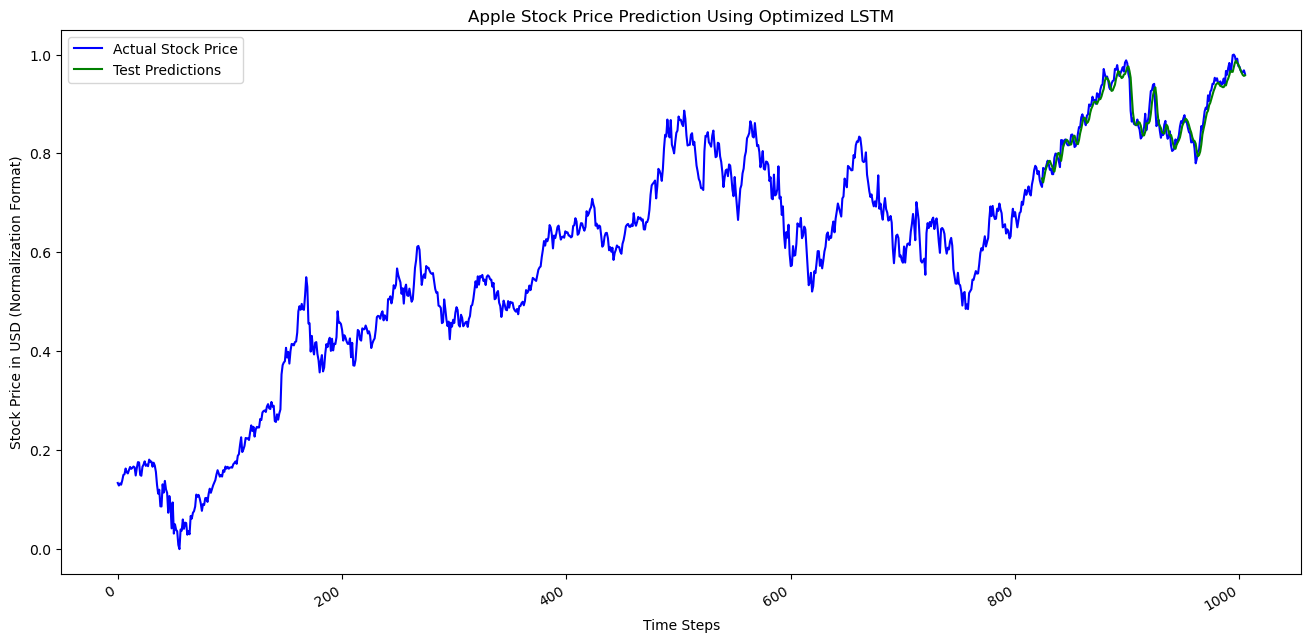

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Inverse transform the predictions and actual values
train_predict_inv = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict_inv = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Create empty arrays for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan

# Calculate the start indices
train_start_idx = look_back
test_start_idx = len(train_predict_inv) + (look_back * 2)

# Ensure the start index for test predictions is valid
if test_start_idx + len(test_predict_inv) <= len(df1):
    # Place the predictions in the correct positions
    trainPredictPlot[train_start_idx:train_start_idx + len(train_predict_inv), :] = train_predict_inv
    testPredictPlot[test_start_idx:test_start_idx + len(test_predict_inv), :] = test_predict_inv
else:
    # Adjust the test_start_idx so that the test predictions fit
    test_start_idx = len(df1) - len(test_predict_inv)
    testPredictPlot[test_start_idx:, :] = test_predict_inv

# Plot the actual prices, training predictions, and test predictions
plt.figure(figsize=(16, 8))
plt.plot(scaler.inverse_transform(df1), label='Actual Stock Price', color='blue')
# plt.plot(trainPredictPlot, label='Training Predictions', color='orange')
plt.plot(testPredictPlot, label='Test Predictions', color='green')

# Add titles and labels
plt.title('Apple Stock Price Prediction Using Optimized LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price in USD (Normalization Format)')

# Display legend
plt.legend()

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()


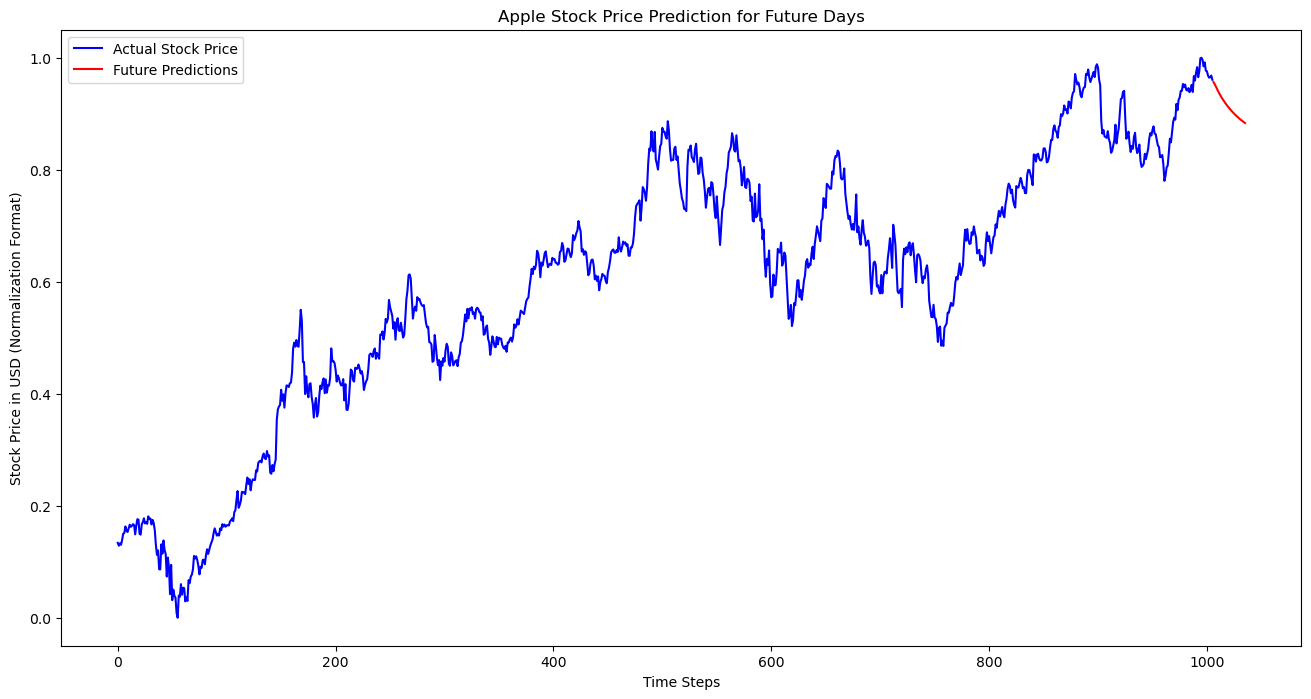

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Start with the last portion of the data
last_data = df1[-look_back:]  # last look_back data points
last_data = last_data.reshape(1, -1)  # Reshape for prediction
last_data = last_data.reshape((1, look_back, 1))  # Reshape to (samples, time steps, features)

# Predict for the next 30 days (or any desired number of future days)
future_predictions = []
n_future_days = 30
temp_input = last_data[0].tolist()

# Flatten the list to avoid the error
temp_input = [item for sublist in temp_input for item in sublist]

for i in range(n_future_days):
    if len(temp_input) > look_back:
        temp_input = temp_input[1:]
    x_input = np.array(temp_input).reshape(1, -1)
    x_input = x_input.reshape((1, look_back, 1))
    yhat = best_model.predict(x_input, verbose=0)
    future_predictions.append(yhat[0][0])
    temp_input.append(yhat[0][0])

# Inverse transform the future predictions
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Extend the data for plotting
future_days = np.arange(len(df1), len(df1) + n_future_days)  # Create a range of future days

# Plotting
plt.figure(figsize=(16, 8))

# Plot actual prices
plt.plot(scaler.inverse_transform(df1), label='Actual Stock Price', color='blue')

# Plot future predictions
plt.plot(future_days, future_predictions_inv, label='Future Predictions', color='red')

# Add titles and labels
plt.title('Apple Stock Price Prediction for Future Days')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price in USD (Normalization Format)')

# Display legend
plt.legend()

# Show the plot
plt.show()


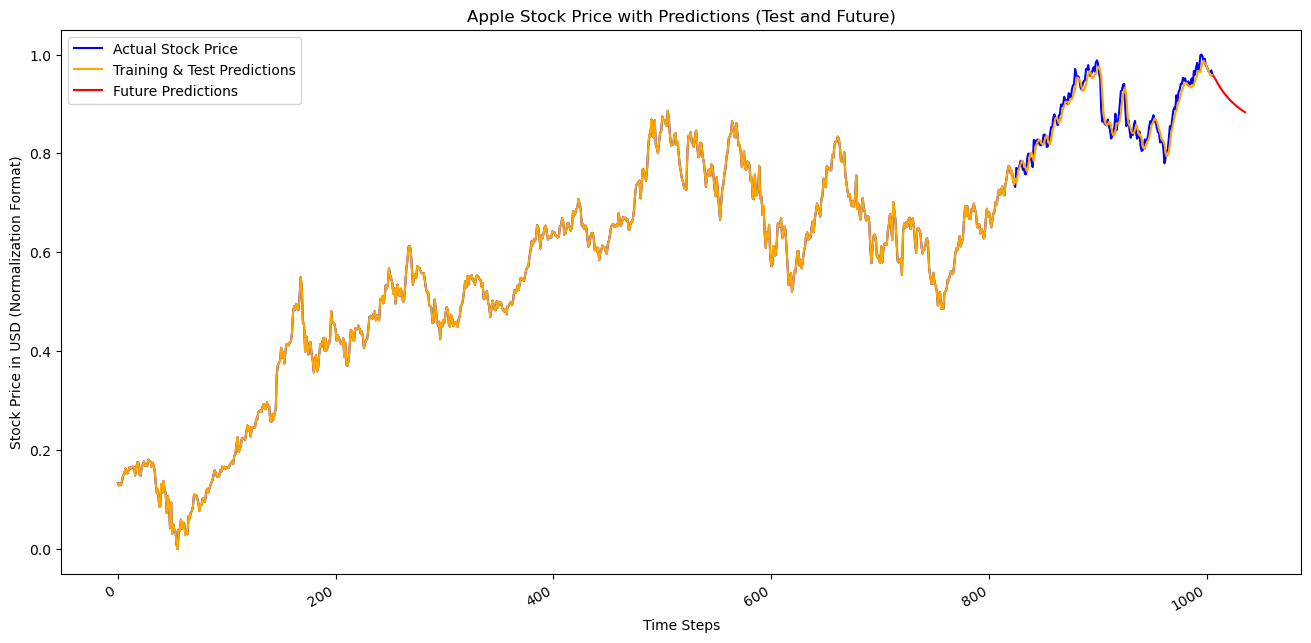

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Combine actual data with test predictions
# (Assuming df1, train_predict, test_predict_inv, and future_predictions_inv are already available)
train_length = len(train_predict)
test_length = len(test_predict_inv)

# Combine actual data with predicted values
combined_data = np.empty_like(df1)
combined_data[:, :] = np.nan
combined_data[:train_length + look_back, :] = scaler.inverse_transform(df1[:train_length + look_back])
combined_data[train_length + look_back:test_length + train_length + look_back, :] = test_predict_inv

# Step 2: Extend the data with future predictions
# Future days for plotting
future_days = np.arange(len(df1), len(df1) + len(future_predictions_inv))

# Plotting
plt.figure(figsize=(16, 8))

# Plot actual and combined data
plt.plot(scaler.inverse_transform(df1), label='Actual Stock Price', color='blue')
plt.plot(combined_data, label='Training & Test Predictions', color='orange')

# Plot future predictions
plt.plot(future_days, future_predictions_inv, label='Future Predictions', color='red')

# Add titles and labels
plt.title('Apple Stock Price with Predictions (Test and Future)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price in USD (Normalization Format)')

# Display legend
plt.legend()

# Optionally, auto-format the dates for better readability
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()


In [55]:
new_df_for_future_predictions = yf.download('AAPL', start='2024-01-01', end='2024-02-01')

[*********************100%%**********************]  1 of 1 completed


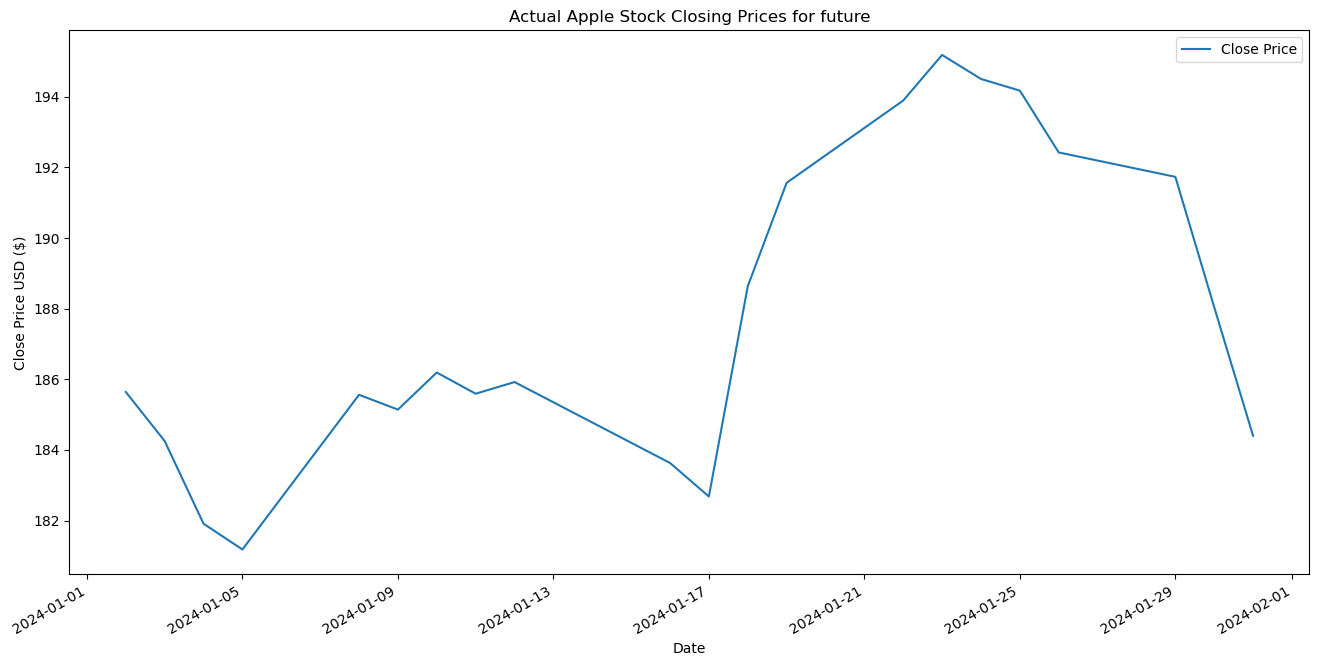

In [56]:
plt.figure(figsize=(16,8))
plt.title('Actual Apple Stock Closing Prices for future')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Plot the 'Close' prices with date index
plt.plot(new_df_for_future_predictions.index, new_df_for_future_predictions['Close'], label='Close Price')

# Optional: Improve date formatting on x-axis
plt.gcf().autofmt_xdate()  # Auto-format date labels for better readability

plt.legend()
plt.show()

D:\anaconda software\envs\datascience\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda software\envs\datascience\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda software\envs\datascience\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda software\envs\datascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda software\e

Best ARIMA Order: (0, 1, 1), AIC: -3628.376526974353
ARIMA Train RMSE: 0.02023145982175069
ARIMA Train MAE: 0.014689784038570205
ARIMA Test RMSE: 0.1986516002751698
ARIMA Test MAE: 0.17023556854108526


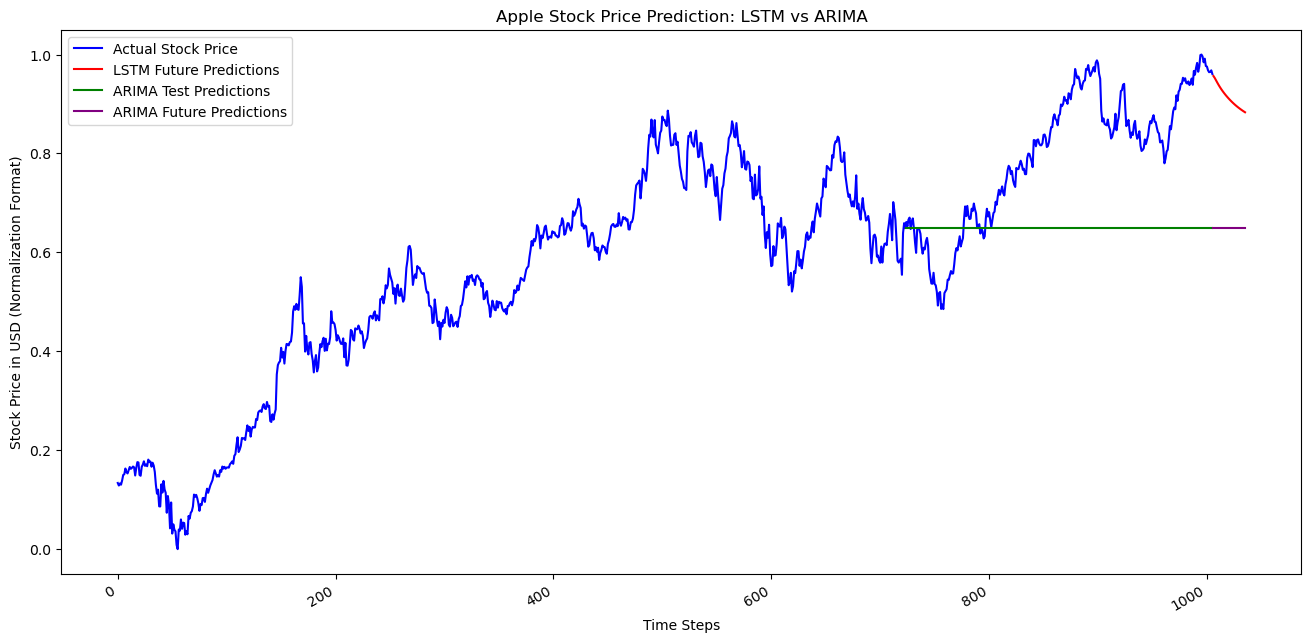

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import itertools

# Assuming you have already loaded the Apple stock data and performed LSTM predictions
train_arima = df1[:train_size]  # Use the same train size as LSTM
test_arima = df1[train_size:]   # Use the same test size as LSTM

# Step 1: Define p, d, q ranges
p = range(0, 5)  # AR term
d = range(0, 2)  # Differencing term
q = range(0, 5)  # MA term

# Generate all possible (p, d, q) combinations
pdq_combinations = list(itertools.product(p, d, q))

# Step 2: Initialize variables to store the best model and results
best_aic = float("inf")
best_order = None
best_model = None

# Step 3: Perform grid search over (p, d, q)
for order in pdq_combinations:
    try:
        arima_model = ARIMA(train_arima, order=order)
        arima_model_fit = arima_model.fit()
        
        # Calculate AIC to evaluate the model
        aic = arima_model_fit.aic
        
        # If this model has the best (lowest) AIC, store it
        if aic < best_aic:
            best_aic = aic
            best_order = order
            best_model = arima_model_fit
            
    except Exception as e:
        continue

# Print the best found order (p, d, q)
print(f'Best ARIMA Order: {best_order}, AIC: {best_aic}')

# Step 4: Make predictions with the best ARIMA model
arima_predictions = best_model.forecast(steps=len(test_arima) + 30)  # Predict test period + next 30 days
arima_test_pred = arima_predictions[:len(test_arima)]
arima_future_pred = arima_predictions[len(test_arima):]

# Calculate RMSE and MAE for both training and testing sets

# ARIMA training predictions (fitted values on training data)
arima_train_pred = best_model.fittedvalues

# Training RMSE and MAE
arima_train_rmse = np.sqrt(mean_squared_error(train_arima, arima_train_pred))
arima_train_mae = mean_absolute_error(train_arima, arima_train_pred)

# Testing RMSE and MAE
arima_test_rmse = np.sqrt(mean_squared_error(test_arima, arima_test_pred))
arima_test_mae = mean_absolute_error(test_arima, arima_test_pred)

# Print the scores
print(f'ARIMA Train RMSE: {arima_train_rmse}')
print(f'ARIMA Train MAE: {arima_train_mae}')
print(f'ARIMA Test RMSE: {arima_test_rmse}')
print(f'ARIMA Test MAE: {arima_test_mae}')

# Step 5: Plot actual prices, LSTM predictions, and ARIMA predictions

# Plot actual stock prices
plt.figure(figsize=(16, 8))
plt.plot(df1, label='Actual Stock Price', color='blue')

# Plot LSTM predictions (assuming future_predictions_inv is available)
plt.plot(future_days, future_predictions_inv, label='LSTM Future Predictions', color='red')

# Plot ARIMA predictions
arima_future_days = np.arange(len(df1), len(df1) + len(arima_future_pred))
plt.plot(np.arange(train_size, train_size + len(arima_test_pred)), arima_test_pred, label='ARIMA Test Predictions', color='green')
plt.plot(arima_future_days, arima_future_pred, label='ARIMA Future Predictions', color='purple')

# Add titles and labels
plt.title('Apple Stock Price Prediction: LSTM vs ARIMA')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price in USD (Normalization Format)')

# Display legend
plt.legend()

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()


ARIMA AIC: -3622.989283546165
ARIMA Train RMSE: 0.020196961624965367
ARIMA Train MAE: 0.014691888807918638
ARIMA Test RMSE: 0.19814525234060373
ARIMA Test MAE: 0.16982719189090337


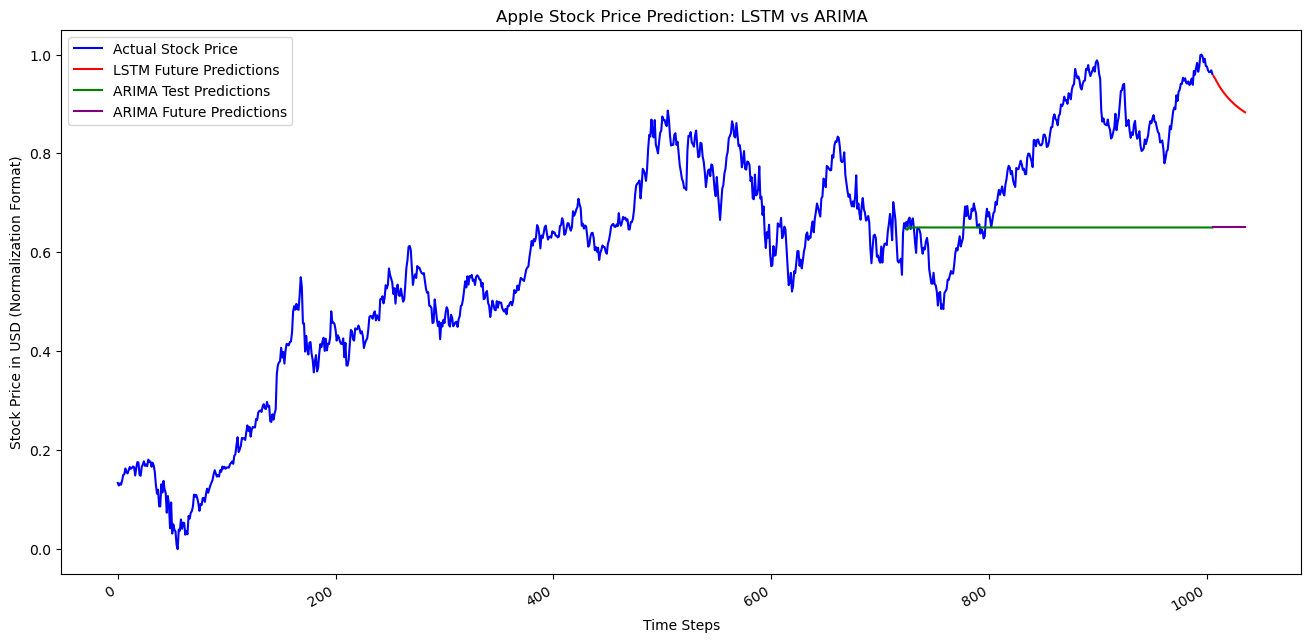

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have already loaded the Apple stock data and performed LSTM predictions
# Prepare the data for ARIMA (no scaling, use raw closing prices)
train_arima = df1[:train_size]  # Use the same train size as LSTM
test_arima = df1[train_size:]   # Use the same test size as LSTM

# Step 2: Fit the ARIMA model
arima_order = (5, 1, 0)  # Example order, adjust as necessary
arima_model = ARIMA(train_arima, order=arima_order)
arima_model_fit = arima_model.fit()

# Extract AIC from the fitted model
arima_aic = arima_model_fit.aic
print(f'ARIMA AIC: {arima_aic}')

# Step 3: Make predictions with ARIMA
arima_predictions = arima_model_fit.forecast(steps=len(test_arima) + 30)  # Predict test period + next 30 days
arima_test_pred = arima_predictions[:len(test_arima)]
arima_future_pred = arima_predictions[len(test_arima):]

# Step 4: Calculate RMSE and MAE for both training and testing sets

# ARIMA training predictions (fitted values on training data)
arima_train_pred = arima_model_fit.fittedvalues

# Training RMSE and MAE
arima_train_rmse = np.sqrt(mean_squared_error(train_arima, arima_train_pred))
arima_train_mae = mean_absolute_error(train_arima, arima_train_pred)

# Testing RMSE and MAE
arima_test_rmse = np.sqrt(mean_squared_error(test_arima, arima_test_pred))
arima_test_mae = mean_absolute_error(test_arima, arima_test_pred)

# Print the scores
print(f'ARIMA Train RMSE: {arima_train_rmse}')
print(f'ARIMA Train MAE: {arima_train_mae}')
print(f'ARIMA Test RMSE: {arima_test_rmse}')
print(f'ARIMA Test MAE: {arima_test_mae}')

# Step 5: Plot actual prices, LSTM predictions, and ARIMA predictions

plt.figure(figsize=(16, 8))

# Plot actual prices
plt.plot(df1, label='Actual Stock Price', color='blue')

# Plot LSTM predictions (already inverse scaled in previous code)
plt.plot(future_days, future_predictions_inv, label='LSTM Future Predictions', color='red')

# Plot ARIMA predictions
arima_future_days = np.arange(len(df1), len(df1) + len(arima_future_pred))
plt.plot(np.arange(train_size, train_size + len(arima_test_pred)), arima_test_pred, label='ARIMA Test Predictions', color='green')
plt.plot(arima_future_days, arima_future_pred, label='ARIMA Future Predictions', color='purple')

# Add titles and labels
plt.title('Apple Stock Price Prediction: LSTM vs ARIMA')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price in USD (Normalization Format)')

# Display legend
plt.legend()

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()
